In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import datetime
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'

In [2]:
data15 = pd.read_csv('./2015pcard_data (1).csv')
data16 = pd.read_csv('./2016pcard_data (1).csv')
data17 = pd.read_csv('./2017pcard_data (1).csv')
input16 = pd.read_csv('./techtrades_2016_data_input_CC (1).csv')
accounts = pd.read_csv('./techtrades_accounts (1).csv')
bu = pd.read_csv('./techtrades_bu (1).csv')

data15.rename(columns={'expensetype': 'ExpenseType'}, inplace=True)

In [3]:
# Travel accounts codes seem to be 84** (except for Non-Travel Meals and Entertainment - 8419)
accounts[(accounts['accountcode'] > 8400) & (accounts['accountcode'] < 8500)]
travel_codes = accounts[(accounts['accountcode'] > 8400) & (accounts['accountcode'] < 8500)]['accountcode'].values
travel_codes = [x for x in travel_codes if x != 8419]
travel_codes

[8405, 8415, 8416, 8417, 8418, 8420, 8422, 8425]

In [4]:
# Transction date to datetime
data15['transactiondate_dt'] = pd.to_datetime(data15['transactiondate'])
data16['transactiondate_dt'] = pd.to_datetime(data16['transactiondate'])
data17['transactiondate_dt'] = pd.to_datetime(data17['transactiondate'])

# Make day-of-year to plot seasonality
data15['doy'] = data15['transactiondate_dt'].apply(lambda x: x.dayofyear)
data16['doy'] = data16['transactiondate_dt'].apply(lambda x: x.dayofyear)
data17['doy'] = data17['transactiondate_dt'].apply(lambda x: x.dayofyear)

In [15]:
def agg_spend(df, category):
    agg = df.loc[df['account'].isin(travel_codes), [category, 'amount']].groupby(category).sum()
    agg = agg.sort_values('amount', ascending=False)
    agg = round(agg, 2) 
    return agg

df_list = {'2017': data17, 
           '2016': data16, 
           '2015': data15}

def disp_group(df_list, category):
    print('Travel spend by {}:'.format(category))
    for df in df_list:
        print(df)
        display(agg_spend(df_list[df], category).head(10))
        
def plot_group(df_list, category):
    for df in df_list:
        data = agg_spend(df_list[df], category).head(10)
        data.sort_values('amount', ascending=True).plot(kind='barh', 
                                                        figsize=(19, 5), 
                                                        title='Travel spending by {} ({})'.format(category, df))

bu_map = {x[0]: x[1] for x in bu.values}

def three_plot(df_list, category):
    plt.figure(figsize=(21, 5))
    counter = 1
    for df in df_list:
        data = agg_spend(df_list[df], category).head(10).sort_values('amount', ascending=True)
        if category == 'bu':
            data.index = data.index.map(bu_map)
        plt.subplot(1, 3, counter)
        plt.barh(data.index, data['amount']/1000000)
        plt.xlabel('Spend ($ million)')
        plt.title('Travel spend by {} ({})'.format(category, df))
        counter += 1
    plt.tight_layout()
    plt.show()

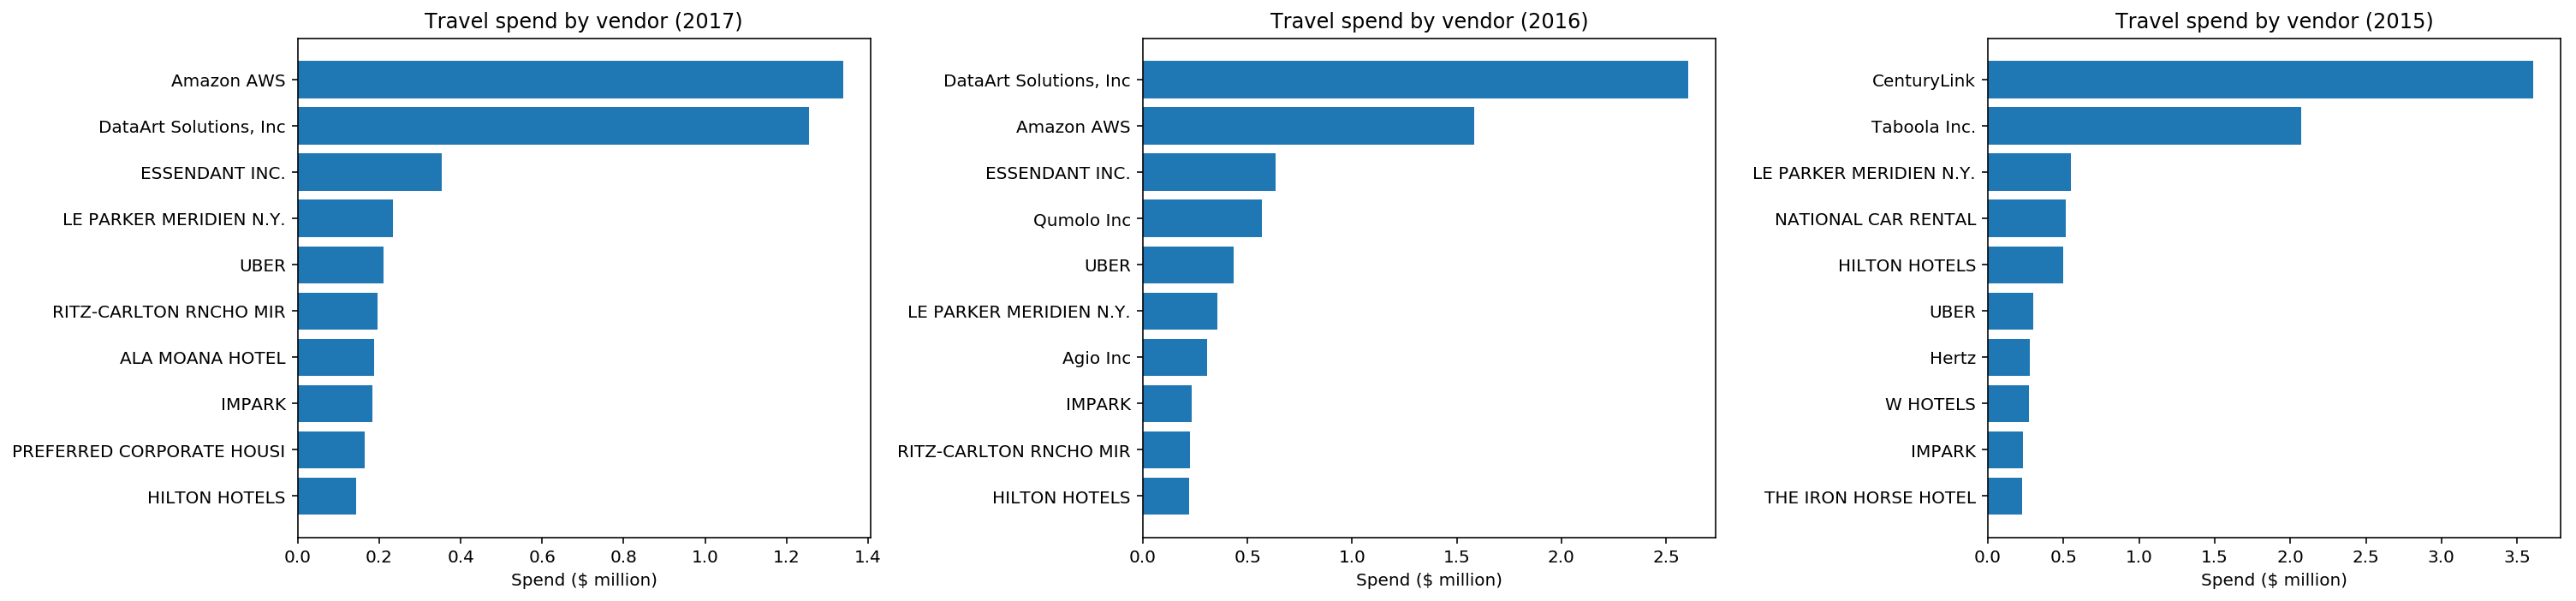

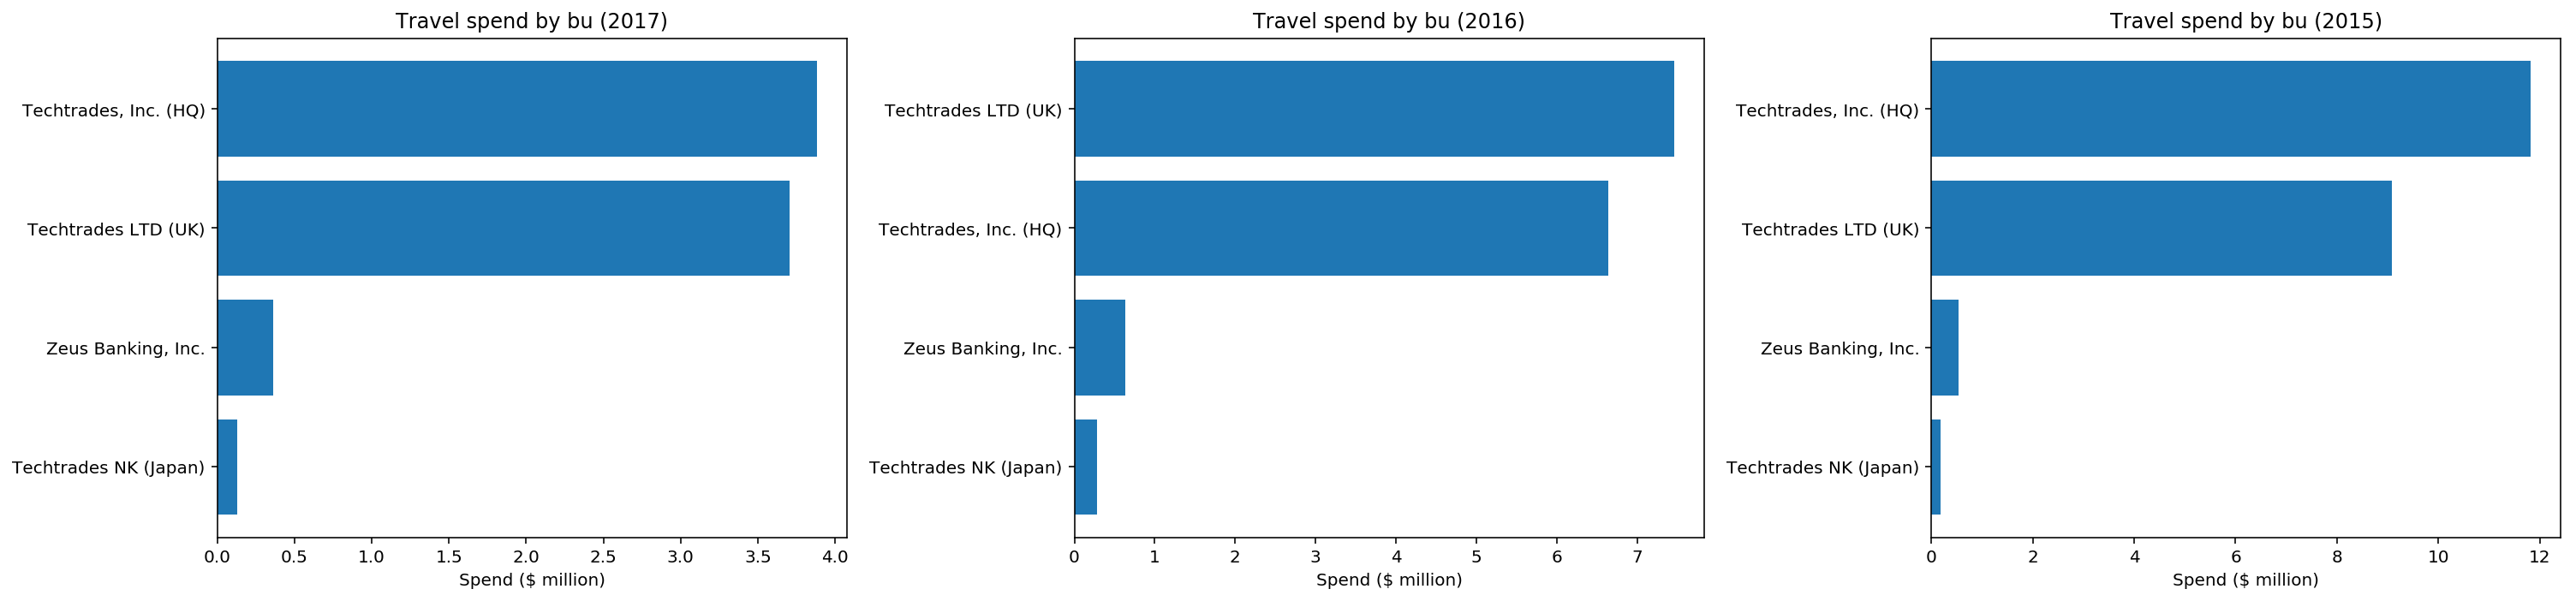

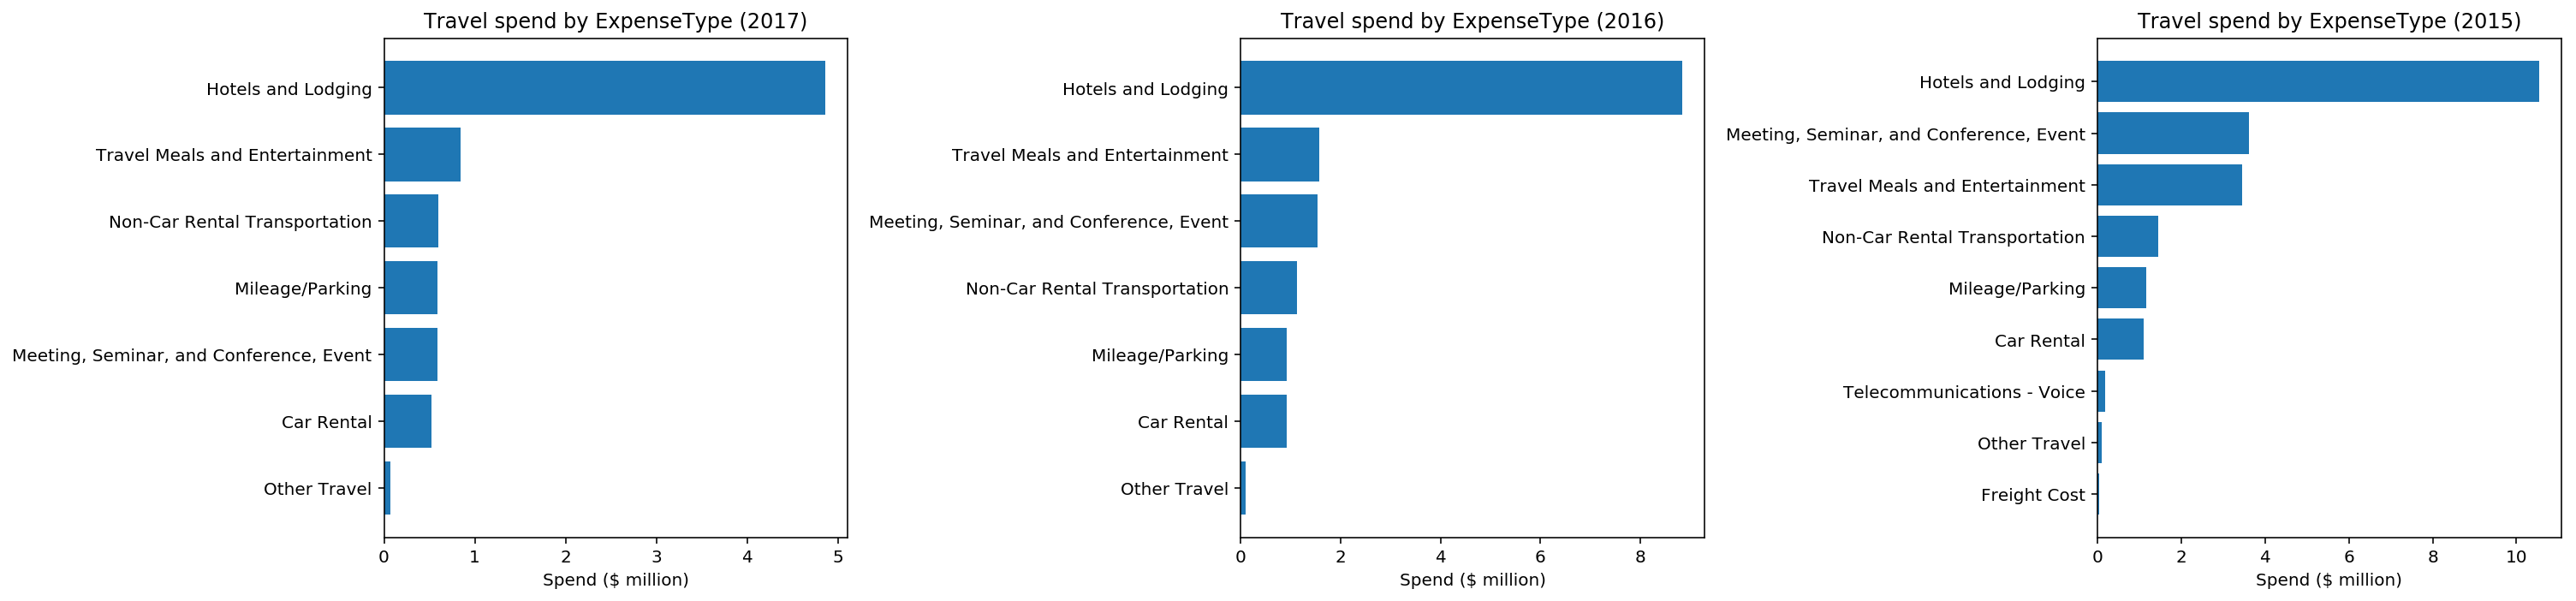

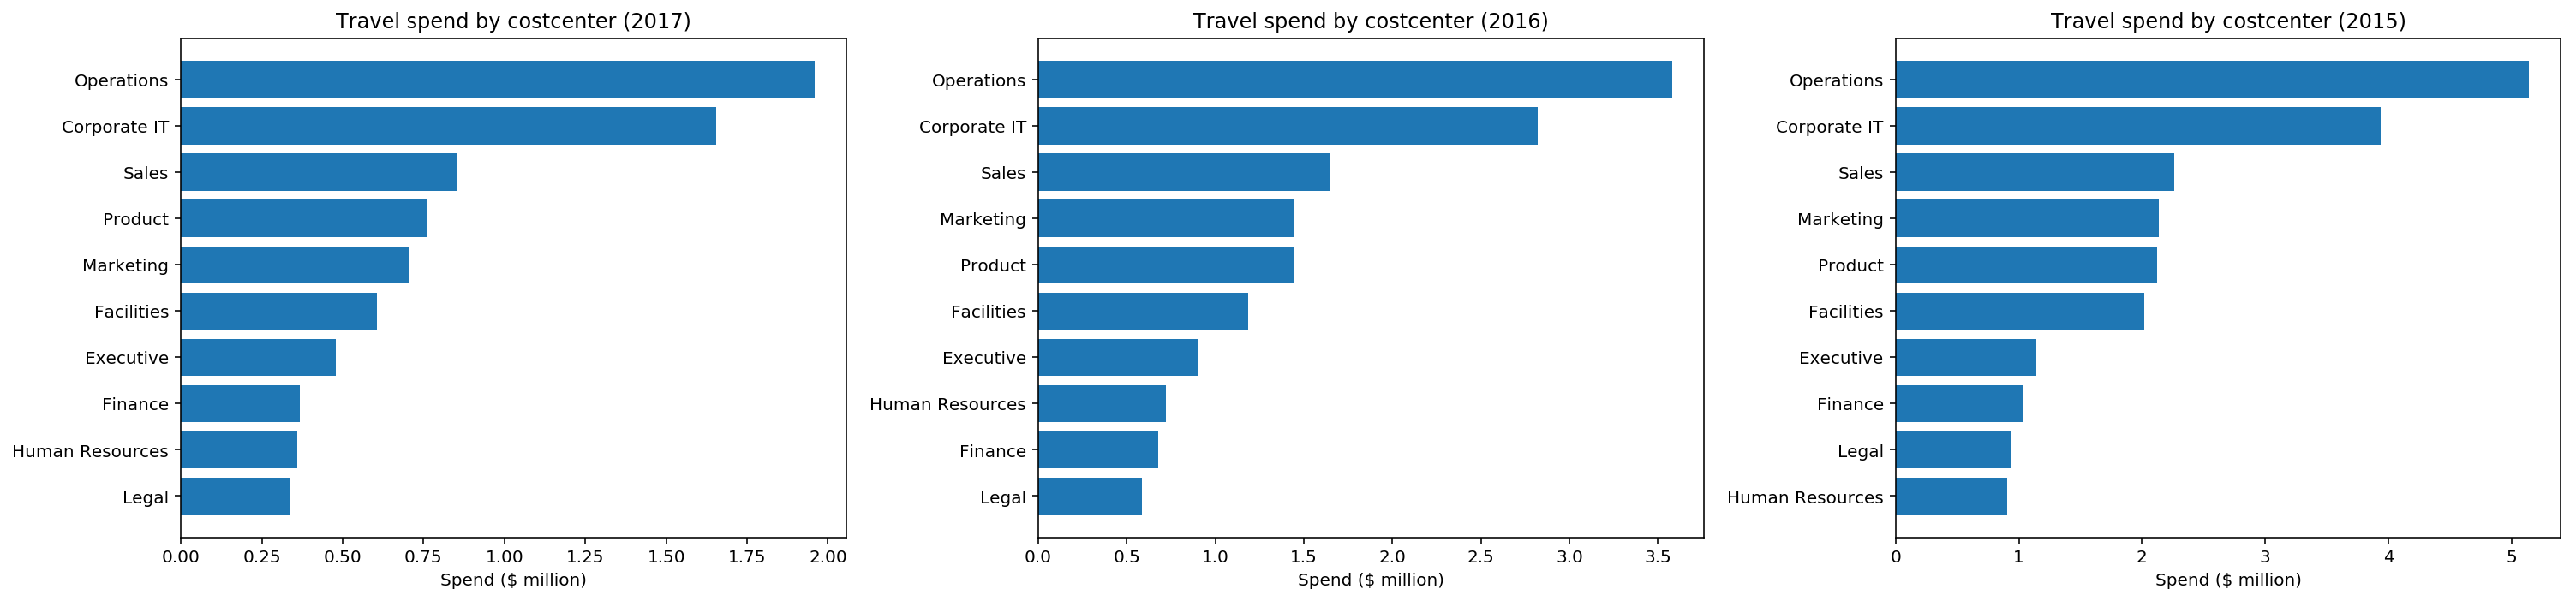

In [40]:
three_plot(df_list, 'vendor')
three_plot(df_list, 'bu')
three_plot(df_list, 'ExpenseType')
three_plot(df_list, 'costcenter')

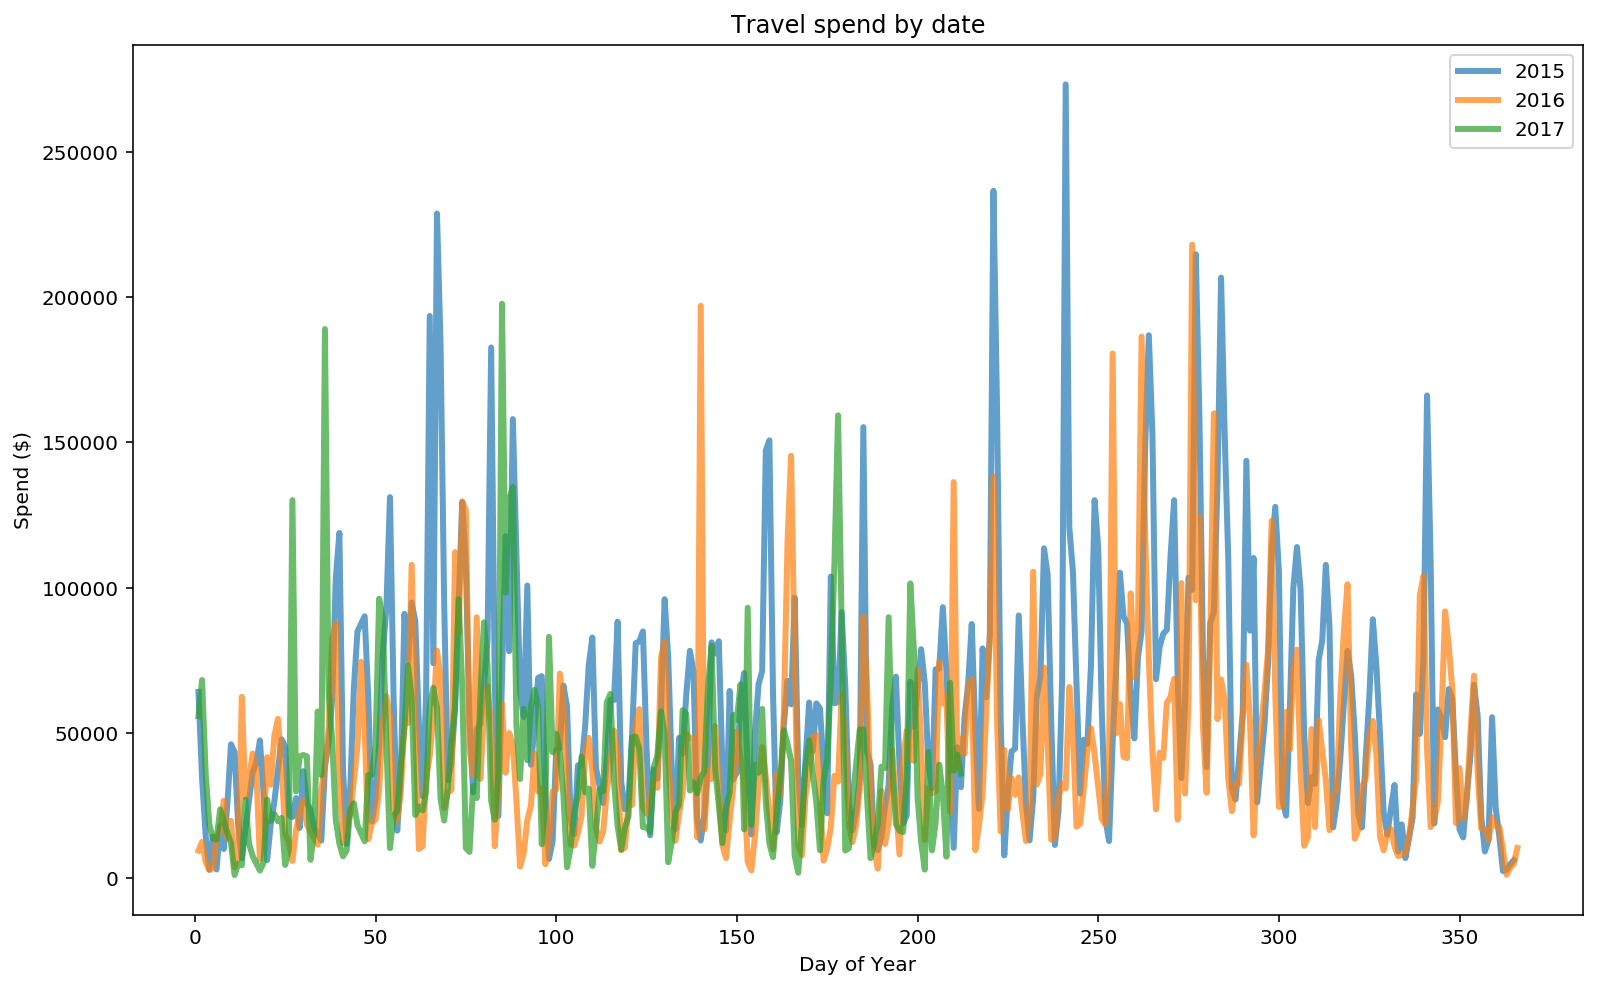

In [41]:
plt.figure(figsize=(13, 8))
plt.plot(data15[data15['account'].isin(travel_codes)].groupby('doy').sum()['amount'], alpha=.7, label='2015', lw=3)
plt.plot(data16[data16['account'].isin(travel_codes)].groupby('doy').sum()['amount'], alpha=.7, label='2016', lw=3)
plt.plot(data17[data17['account'].isin(travel_codes)].groupby('doy').sum()['amount'], alpha=.7, label='2017', lw=3)
plt.xlabel('Day of Year')
plt.ylabel('Spend ($)')
plt.title('Travel spend by date')
plt.legend()
plt.show()